<font size="6">**PREDICTING WINE QUALITY**<font>

## I’ve written up a Jupyter notebook below that explores the performance of several commonly used decision tree learning methods in predicting the quality of wine through a synthetic “tastiness” index.##

# Prerequisites :-#

## 1. Python## 
## 2. scikit-learn / sklearn## 
## 3. Pandas## 
## 4. NumPy
## 5. matplotlib
## 6. An environment to work in - something like Jupyter or Spyder

# WorkFlow :-
### The workflow for the project is described in  steps given below:
### Perform data cleaning using pandas library. Which includes replacing dropping useless information and filling missing values
### Make a Exploratory Data Analysis on the data using pandas.
### Visualize distributions and correlation of features using seaborn and pandas
### Build a regression or classification model to predict the wine quality
### Use various other standard regression or classification models and compre them using appropriate metrics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing all the required packages.

In [2]:
df=pd.read_csv("winequality.csv")

Reading the dataset.

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [4]:
df.shape

(6497, 14)

Getting the total no. of rows and columns in the dataset.

In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0,white


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

Printing the names of column headings of the dataset

In [8]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
good                    False
color                   False
dtype: bool

## It tells us that we don't have any null or missing data.

In [9]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

Getting the unique values of quality column of the dataset.

In [10]:
df['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [11]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

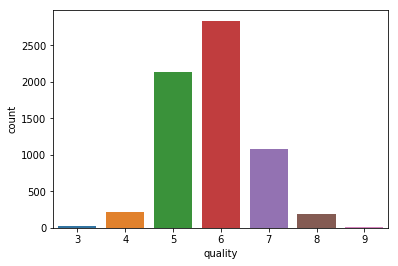

In [12]:
sns.countplot(x=df['quality'])

Getting the total count of the values of quality column.

In [13]:
def isTasty(quality):
    if quality >= 7:
        return 1
    else:
        return 0

Making a function which take values of quality column as input.

In [14]:
df['taste'] = df['quality'].apply(isTasty)

In [15]:
df=df.drop(['good','color'],axis=1)

Dropping the useless columns from the dataset.

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'taste'],
      dtype='object')

In [17]:
df['taste'].value_counts()

0    5220
1    1277
Name: taste, dtype: int64

In [18]:
data = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target = df['taste']

Dividing the dataset into X and Y part.

In [21]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data,target,test_size = 0.2,random_state=1)

Spliting the dataset into training and testing sub-parts.

In [23]:
[x.shape for x in [data_train,data_test,target_train,target_test]]

[(5197, 11), (1300, 11), (5197,), (1300,)]

Getting the no. of rows and columns of all sub-parts.

# Data Visualization

C:\Users\harman\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


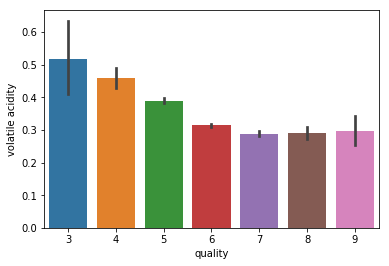

In [24]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

Barplot showing the relation between quality and volatile acidity.

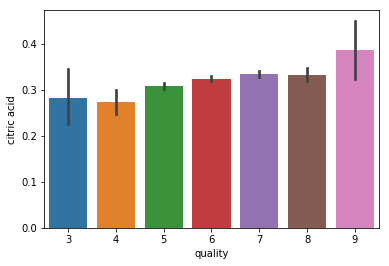

In [25]:
sns.barplot(x = 'quality', y = 'citric acid', data = df)

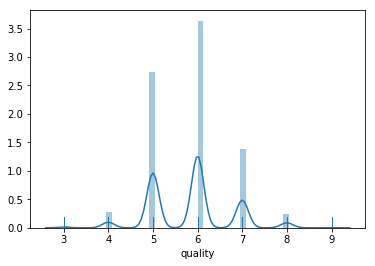

In [26]:
sns.distplot(df['quality'],kde=True,rug=True)

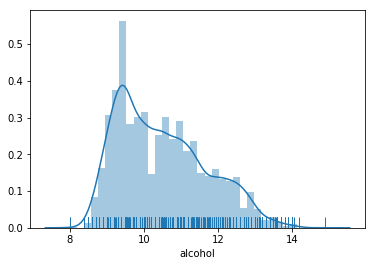

In [27]:
sns.distplot(df['alcohol'],kde=True,rug=True)

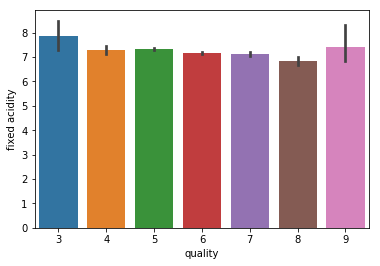

In [28]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

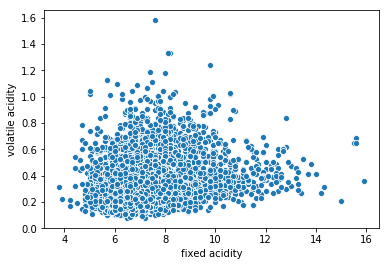

In [29]:
sns.scatterplot(x='fixed acidity',y='volatile acidity',data=df)

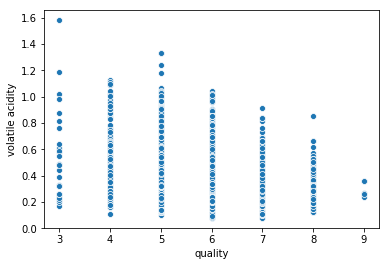

In [30]:
sns.scatterplot(x='quality',y='volatile acidity',data=df)

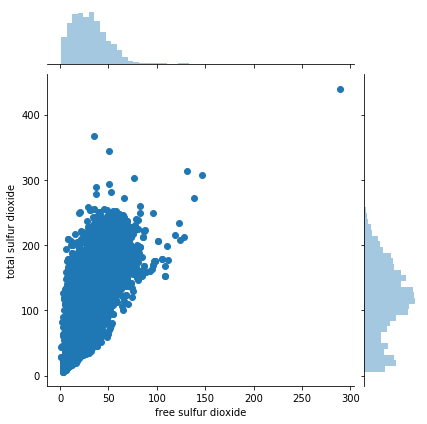

In [31]:
sns.jointplot(x='free sulfur dioxide',y='total sulfur dioxide',data=df)

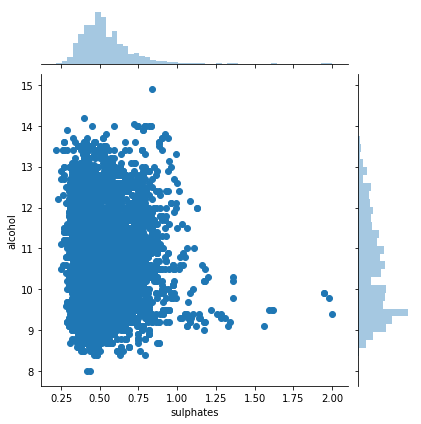

In [32]:
sns.jointplot(x='sulphates',y='alcohol',data=df)

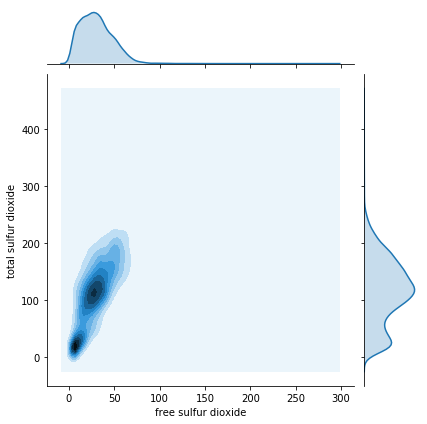

In [33]:
sns.jointplot(x='free sulfur dioxide',y='total sulfur dioxide',data=df,kind='kde')

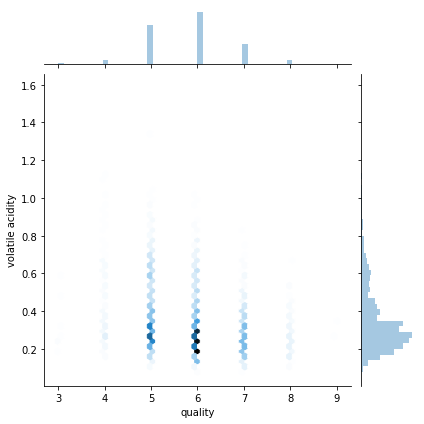

In [34]:
sns.jointplot(x = 'quality', y = 'volatile acidity', data = df,kind='hex')

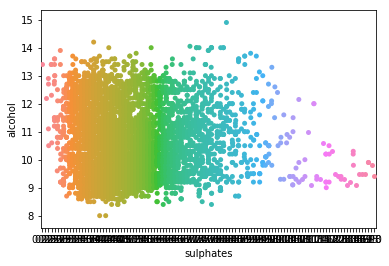

In [35]:
sns.stripplot(x='sulphates',y='alcohol',data=df)

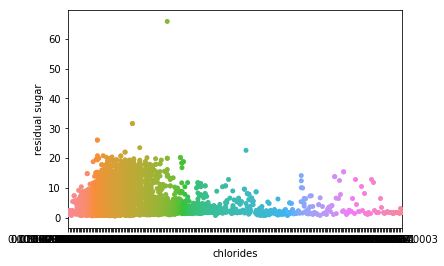

In [36]:
sns.stripplot(x='chlorides',y='residual sugar',data=df)

## Algorithms used to train the model are:
### 1. Decision tree Classifier
### 2. Gradient boosting Classifier
### 3. Random Forest Classifier

# Decision tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
simpleTree = DecisionTreeClassifier(max_depth=5)

### Using the decision tree algo to train the model.

In [38]:
simpleTree.fit(data_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Fitting the decision tree algorithm on the dataset.

In [39]:
y_pred=simpleTree.predict(data_test)

In [40]:
from sklearn import metrics
score1=metrics.accuracy_score(target_test,y_pred)
print("Accuracy is:",score1)

Accuracy is: 0.8253846153846154


# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [44]:
logistic.fit(data_train,target_train)

C:\Users\harman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
y1_pred = logistic.predict(data_test)

In [46]:
from sklearn.metrics import accuracy_score
score2=accuracy_score(target_test,y1_pred)
print("Accuracy is:",score2)

Accuracy is: 0.8307692307692308


# Random Forest Classifier:

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfTree = RandomForestClassifier()

In [48]:
rfTree.fit(data_train,target_train)

C:\Users\harman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
y2_pred = rfTree.predict(data_test)

In [50]:
from sklearn import metrics
score3=metrics.accuracy_score(target_test,y2_pred)
print("Accuracy is:",score3)

Accuracy is: 0.88


# Random Forest Classifier is best suitable model for our data.